In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from config import *
from fastai import *
from fastai.text import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
ulmfit_conf = ULMFiTConfig()
DATA_PATH = ulmfit_conf.data_path
PATH = ulmfit_conf.data_dir

## Preparing Data for Model

In [ ]:
data = pd.read_csv(DATA_PATH, encoding='utf-8', sep='\t',
                   names=['qid', 'query', 'passage', 'label', 'pid'])

In [ ]:
pd.value_counts(data['label'])

In [6]:
train, test = train_test_split(data, random_state=ulmfit_conf.random_state,
                              test_size=0.2, stratify=data['label'])

In [ ]:
data = None

In [8]:
pd.value_counts(train['label'])

0    3774154
1     419350
Name: label, dtype: int64

In [9]:
pd.value_counts(test['label'])

0    943538
1    104838
Name: label, dtype: int64

In [10]:
data_lm = TextLMDataBunch.from_df(path=ulmfit_conf.data_dir, 
                                  train_df=train, 
                                  valid_df=test, text_cols=['passage'])
data_lm.save('train_lm_data')

In [4]:
data_lm = TextLMDataBunch.load(ulmfit_conf.data_dir, 'train_lm_data', bs=ulmfit_conf.bs)

In [5]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


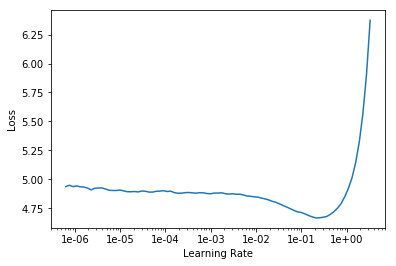

In [12]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.740376,4.143353,0.289738


In [14]:
learn.save('fit_head_sample')

In [32]:
learn.load('fit_head_sample')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (1744 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /media/saqib/ni/Projects/Microsoft/AI_Challenge_18/data
x: LMTextList (1744 items)
[Text xxbos xxfld 1 xxmaj about xxup rwa . xxmaj about xxup rwa ; xxmaj history ; xxmaj board of xxmaj xxunk ; xxmaj xxunk ; xxmaj community xxmaj involvement ; xxmaj xxunk ; xxmaj honor xxmaj roll xxmaj authors ; xxmaj published xxmaj authors ; xxmaj reader xxmaj statistics ; xxmaj romance xxmaj statistics ; xxmaj xxunk xxmaj xxunk ; xxmaj staff xxmaj xxunk ; xxmaj xxunk with xxup rwa ; xxmaj about xxmaj the xxmaj romance xxmaj genre . xxmaj the xxmaj romance xxmaj genre ; xxmaj romance xxmaj statistics ; xxmaj industry xxmaj statistics ; xxmaj author xxmaj websites ; xxmaj xxunk ; xxmaj xxunk of xxmaj fame ; xxmaj honor xxmaj roll, Text xxbos xxfld 1 xxmaj how much does an xxmaj asthma xxmaj inhaler cost ? xxmaj traditionally , an xxmaj albuterol inhaler 

In [34]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy


RuntimeError: Expected tensor for argument #1 'indices' to have scalar type Long; but got torch.cuda.HalfTensor instead (while checking arguments for embedding)

In [19]:
learn.save_encoder('sample_encoder')

In [33]:
learn.to_fp16()

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (1744 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /media/saqib/ni/Projects/Microsoft/AI_Challenge_18/data
x: LMTextList (1744 items)
[Text xxbos xxfld 1 xxmaj about xxup rwa . xxmaj about xxup rwa ; xxmaj history ; xxmaj board of xxmaj xxunk ; xxmaj xxunk ; xxmaj community xxmaj involvement ; xxmaj xxunk ; xxmaj honor xxmaj roll xxmaj authors ; xxmaj published xxmaj authors ; xxmaj reader xxmaj statistics ; xxmaj romance xxmaj statistics ; xxmaj xxunk xxmaj xxunk ; xxmaj staff xxmaj xxunk ; xxmaj xxunk with xxup rwa ; xxmaj about xxmaj the xxmaj romance xxmaj genre . xxmaj the xxmaj romance xxmaj genre ; xxmaj romance xxmaj statistics ; xxmaj industry xxmaj statistics ; xxmaj author xxmaj websites ; xxmaj xxunk ; xxmaj xxunk of xxmaj fame ; xxmaj honor xxmaj roll, Text xxbos xxfld 1 xxmaj how much does an xxmaj asthma xxmaj inhaler cost ? xxmaj traditionally , an xxmaj albuterol inhaler 

In [21]:
learn = learn.model[0]

In [26]:
state_dict = torch.load('../../data/models/sample_encoder.pth')

In [27]:
state_dict

OrderedDict([('encoder.weight',
              tensor([[ 0.0960, -0.1418, -0.6190,  ..., -0.3504,  0.0682, -0.4601],
                      [ 0.1946, -0.0115,  0.1428,  ..., -0.0103, -0.0151, -0.1357],
                      [-0.6398,  0.1223, -0.2812,  ...,  0.1162, -0.5736,  0.5251],
                      ...,
                      [ 0.1403, -0.1119,  0.4705,  ...,  0.1669,  0.3087,  0.0305],
                      [ 0.3783,  0.6061,  0.6225,  ..., -0.2697,  0.4633,  0.0732],
                      [ 0.2328,  0.3468,  0.4393,  ...,  0.2017,  0.9820,  0.0264]],
                     device='cuda:0')),
             ('encoder_dp.emb.weight',
              tensor([[ 0.0960, -0.1418, -0.6190,  ..., -0.3504,  0.0682, -0.4601],
                      [ 0.1946, -0.0115,  0.1428,  ..., -0.0103, -0.0151, -0.1357],
                      [-0.6398,  0.1223, -0.2812,  ...,  0.1162, -0.5736,  0.5251],
                      ...,
                      [ 0.1403, -0.1119,  0.4705,  ...,  0.1669,  0.3087,  0.0

In [28]:
keys = list(state_dict.keys())

In [29]:
keys

['encoder.weight',
 'encoder_dp.emb.weight',
 'rnns.0.weight_hh_l0_raw',
 'rnns.0.module.weight_ih_l0',
 'rnns.0.module.weight_hh_l0',
 'rnns.0.module.bias_ih_l0',
 'rnns.0.module.bias_hh_l0',
 'rnns.1.weight_hh_l0_raw',
 'rnns.1.module.weight_ih_l0',
 'rnns.1.module.weight_hh_l0',
 'rnns.1.module.bias_ih_l0',
 'rnns.1.module.bias_hh_l0',
 'rnns.2.weight_hh_l0_raw',
 'rnns.2.module.weight_ih_l0',
 'rnns.2.module.weight_hh_l0',
 'rnns.2.module.bias_ih_l0',
 'rnns.2.module.bias_hh_l0']

In [36]:
save_model = callbacks.SaveModelCallback(learn)

In [37]:
learn.fit_one_cycle(4, moms=(0.8, 0.7), callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.747317,4.276361,0.290509
2,4.387459,3.932683,0.317260
3,4.056827,3.756846,0.323439
4,3.856960,3.716319,0.332694


NameError: name 'path' is not defined